In [2]:
print("Ejercicio 2 Regresion Lineal")

Ejercicio 2 Regresion Lineal


In [74]:
#Cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [75]:
#Librerias para implementar ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [76]:
#Lectura de datos en Python
Datos = pd.read_csv('C:/Users/MERCEDES/Desktop/heart_cleveland_upload.csv')
df=pd.read_csv('C:/Users/MERCEDES/Desktop/heart_cleveland_upload.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [77]:
df.rename({'condition':'cardiaco','sex':'sexo','cp':'Tipo Dolor Toraxico','age':'edad','trestbps':'Presion Arterial','chol':'colesterol','fbs':'Glicemia'},axis=1,inplace=True)
df

,edad,sexo,Tipo Dolor Toraxico,Presion Arterial,colesterol,Glicemia,restecg,thalach,exang,oldpeak,slope,ca,thal,cardiaco
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [8]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


AttributeError: Text.set() got an unexpected keyword argument 'frontsize'

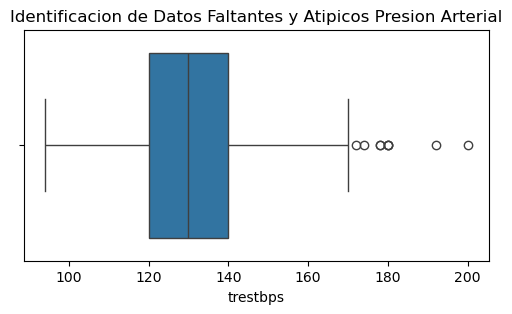

In [9]:
#Identificacion de datos faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificacion de Datos Faltantes y Atipicos Presion Arterial', frontsize=10)

<Axes: xlabel='chol'>

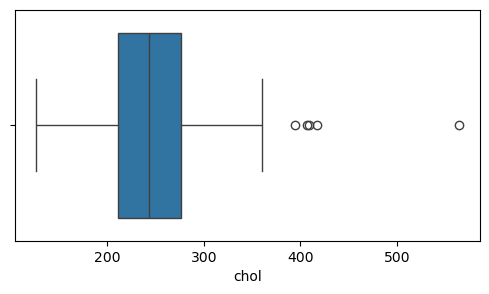

In [12]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chol'])

<Axes: xlabel='thalach'>

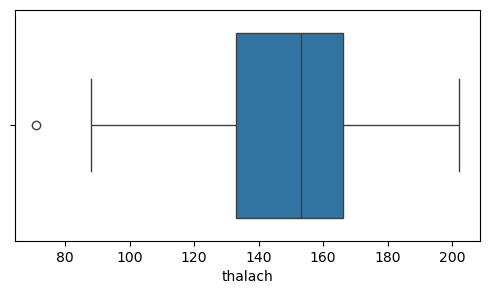

In [13]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thalach'])

<Axes: xlabel='age'>

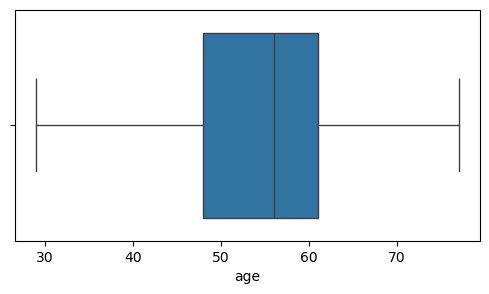

In [14]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['age'])

<Axes: xlabel='oldpeak'>

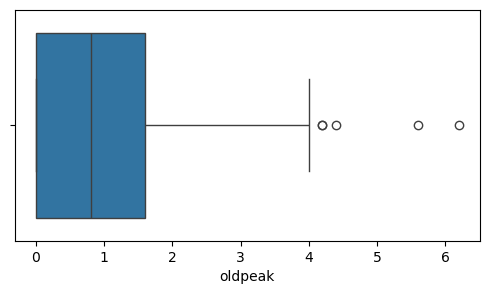

In [15]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])

In [16]:
#Conteo de Datos Atipicos

nivel_minimo=90
nivel_maximo=180
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El Total de los Datos Atipico es {}".format(Total_Atipicos))

El Total de los Datos Atipico es 2


In [17]:
#Conteo de Datos Atipicos

nivel_minimo=100
nivel_maximo=350
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El Total de los Datos Atipico es {}".format(Total_Atipicos))


El Total de los Datos Atipico es 8


In [18]:
#Conteo de Datos Atipicos

nivel_minimo=60
nivel_maximo=200
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El Total de los Datos Atipico es {}".format(Total_Atipicos))

El Total de los Datos Atipico es 1


In [19]:
#Conteo de Datos Atipicos

nivel_minimo=0.0
nivel_maximo=2.0
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El Total de los Datos Atipico es {}".format(Total_Atipicos))

El Total de los Datos Atipico es 50


In [20]:
#Filtrar Datos Atipicos

Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]
Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]
Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]
Datos=Datos[(Datos['oldpeak']<nivel_maximo)&(Datos['oldpeak']>nivel_minimo)]

In [21]:
#Validacion si se removieron lod datos atipicos

Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El Total de los Datos Atipico es {}".format(Total_Atipicos))

El Total de los Datos Atipico es 0


In [22]:
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El Total de los Datos Atipico es {}".format(Total_Atipicos))

El Total de los Datos Atipico es 0


In [23]:
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El Total de los Datos Atipico es {}".format(Total_Atipicos))

El Total de los Datos Atipico es 0


In [24]:
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El Total de los Datos Atipico es {}".format(Total_Atipicos))

El Total de los Datos Atipico es 0


In [10]:
#Revision del tipo de Datos  y Datos FaLtantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [11]:
#Total de Personas con la condicion

Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [59]:
#Datos para entrenamiento(Train)=75% y para prueba Test=25%}

X=Datos.drop('condition',axis=1) #Se cargan los datos de train sin los datos de condition
Y=Datos['condition'] #Se cargan los datos de train con los datos de condition

#la funcion traint_test_split crea una division de un conjunto de datos en dos bloques uno de entrenamiento y otro de pruena (train and test)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.25, stratify=Y, random_state=0)


In [60]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [61]:
print(X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
185   62    0   3       140   268    0        2      160      0      3.6   
157   70    1   3       145   174    0        0      125      1      2.6   
110   54    0   2       135   304    1        0      170      0      0.0   
39    56    1   1       130   221    0        2      163      0      0.0   
198   60    1   3       130   206    0        2      132      1      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
278   45    1   3       115   260    0        2      185      0      0.0   
163   67    1   3       100   299    0        2      125      1      0.9   
137   44    0   2       108   141    0        0      175      0      0.6   
33    57    0   1       130   236    0        2      174      0      0.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
185      2   2     0  
157      2   0     2  
110      0   0    

In [68]:
#Construir el modelo de Regresion Logistica

modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit (X_train, Y_train)

#Crear modelo de Prediccion

prediccion = modelo_regresion.predict(X_test)

In [69]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,62,0,3,140,268,0,2,160,0,3.6,2,2,0
157,70,1,3,145,174,0,0,125,1,2.6,2,0,2
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0
202,60,1,3,140,293,0,2,170,0,1.2,1,2,2
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0
272,46,0,3,138,243,0,2,152,1,0.0,1,0,0
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2


In [70]:
print(prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [71]:
# Desempeño del modelo de Regresion

print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



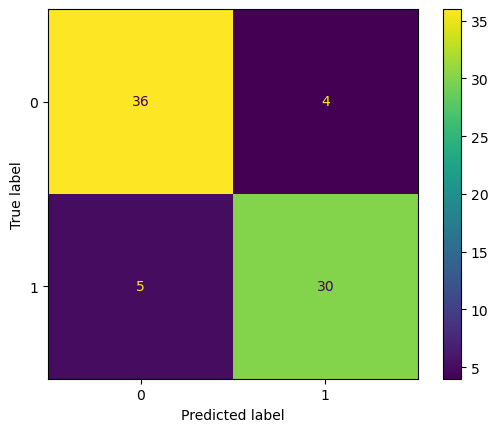

In [83]:
# Matrix de Consusion del Modelo

cm=confusion_matrix(Y_test, prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

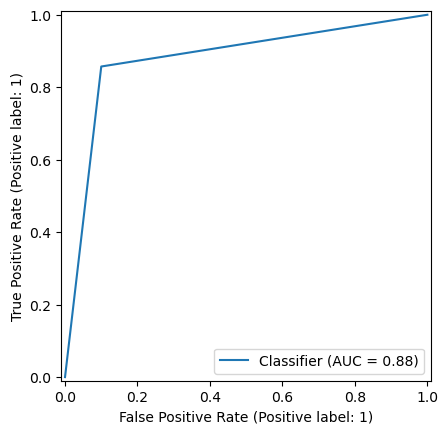

In [85]:
# Curva de Precision del Modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions (Y_test, prediccion)
plt.show()